In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
import datetime as dt
from ScrapeStockExchange import GetData as GD

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 200)


               Close      Volume
Date                            
2017-01-02  51907.77   298252.57
2017-01-03  52532.35   948802.43
2017-01-04  52753.84  1132899.36
2017-01-05  52721.67   912200.78
2017-01-09  53006.63   798484.06


In [2]:
pd.read_csv('WSE_tickers.csv')['code'].to_list()[100:115]

['DINOPL',
 'DOMDEV',
 'DREWEX',
 'DROP',
 'DROZAPOL',
 'ECHO',
 'EDINVEST',
 'EFEKT',
 'EKOEXPORT',
 'ELBUDOWA',
 'ELEKTROTI',
 'ELEMENTAL',
 'ELKOP',
 'ELZAB',
 'EMCINSMED']

In [3]:
df = GD('ECHO',start='2017-01-01')

In [4]:
df.head()

,Close,Volume
Date,,
2017-01-02,5.36,99143.0
2017-01-03,5.60,212248.0
2017-01-04,5.81,128505.0
2017-01-05,5.90,155035.0
2017-01-09,5.80,153418.0


In [26]:
# Expected Return
df['DailyReturn'] = df['Close'].pct_change() ## it's the same (df['Risk'] = df['Close']/df['Close'].shift(1)-1)
df['30daysReturn'] = df['Close'].pct_change(periods=30)
df['60daysReturn'] = df['Close'].pct_change(periods=60)
df['90daysReturn'] = df['Close'].pct_change(periods=90)
df['180daysReturn'] = df['Close'].pct_change(periods=180)
df['360daysReturn'] = df['Close'].pct_change(periods=360)
monthly_returns = df['Close'].resample('M').ffill().pct_change()
daily_returns = df['Close'].pct_change()
monthly_log_returns = np.log(df['Close'].resample('M').ffill().pct_change()+1)
cum_returns = (daily_returns + 1).cumprod()
#quarter_returns = df['Close'].resample("4M").mean()

In [6]:
df['Close'].resample("3M").mean()

Date
2017-01-31    5.666190
2017-04-30    5.790328
2017-07-31    5.592222
2017-10-31    5.185156
2018-01-31    4.734333
2018-04-30    5.112131
2018-07-31    4.479048
2018-10-31    4.256308
2019-01-31    3.651228
2019-04-30    3.855750
2019-07-31    3.965556
2019-10-31    4.386364
Freq: 3M, Name: Close, dtype: float64

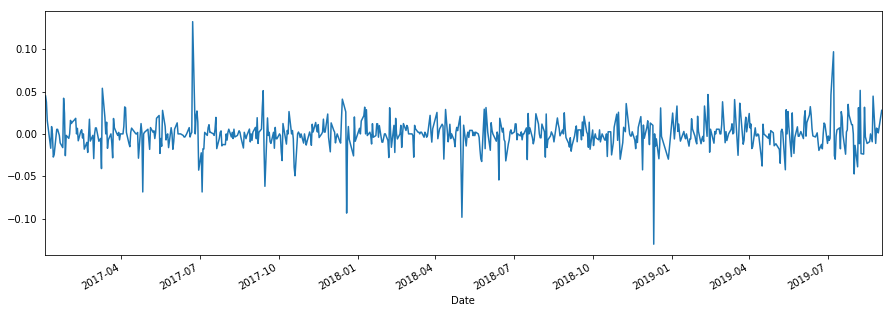

In [7]:
df['DailyReturn'].plot(figsize=(15,5))

In [8]:
Moving_Averages_Days = [15,30,60]  # Simple Moving Averages 
df['SMA_15'] = df['Close'].rolling(window=15).mean()  
df['SMA_30'] = df['Close'].rolling(window=30).mean()  
df['SMA_60'] = df['Close'].rolling(window=60).mean()  

In [9]:
df.head()

,Close,Volume,DailyReturn,30daysReturn,60daysReturn,90daysReturn,180daysReturn,360daysReturn,SMA_15,SMA_30,SMA_60
Date,,,,,,,,,,,
2017-01-02,5.36,99143.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-03,5.60,212248.0,0.044776,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04,5.81,128505.0,0.037500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-05,5.90,155035.0,0.015491,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-09,5.80,153418.0,-0.016949,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


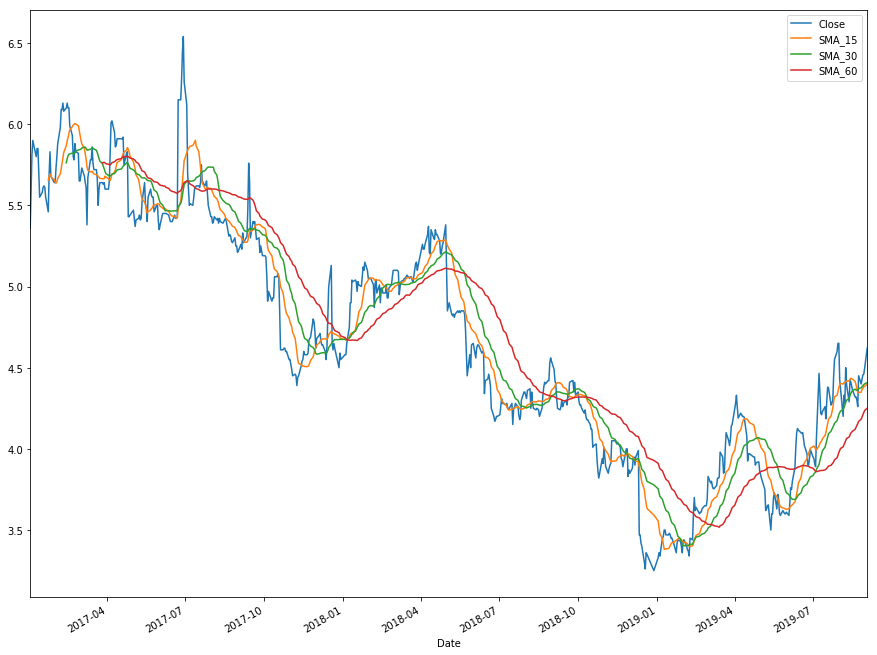

In [10]:
df[['Close','SMA_15','SMA_30','SMA_60']].plot(figsize=(15,12))

In [11]:
monthly_returns.mean()


-0.0028740096774188297

In [12]:
daily_returns.mean()


-5.283817115443576e-05

In [13]:
monthly_returns.std()

0.08302360623136155

In [14]:
daily_returns.std()

0.018543355489738195

In [27]:
df

,Close,Volume,DailyReturn,30daysReturn,60daysReturn,90daysReturn,180daysReturn,360daysReturn,SMA_15,SMA_30,SMA_60
Date,,,,,,,,,,,
2017-01-02,5.360,99143.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-03,5.600,212248.0,0.044776,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04,5.810,128505.0,0.037500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-05,5.900,155035.0,0.015491,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-09,5.800,153418.0,-0.016949,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-10,5.850,119620.0,0.008621,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-11,5.850,33420.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-12,5.690,166462.0,-0.027350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-13,5.550,250286.0,-0.024605,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
wig20 = GD('WIG20',start='2017-01-01')
wig = GD('WIG',start='2017-01-01')

In [20]:
wig.head()

,Close,Volume
Date,,
2017-01-02,51907.77,298252.57
2017-01-03,52532.35,948802.43
2017-01-04,52753.84,1132899.36
2017-01-05,52721.67,912200.78
2017-01-09,53006.63,798484.06


In [23]:
wig['Close'].resample('3BM').apply(lambda x: x[-1])

Date
2017-01-31    55232.32
2017-04-28    61644.56
2017-07-31    62595.76
2017-10-31    64866.57
2018-01-31    66048.17
2018-04-30    59932.46
2018-07-31    59964.47
2018-10-31    55312.71
2019-01-31    60367.42
2019-04-30    60145.50
2019-07-31    59670.60
2019-10-31    56965.68
Freq: 3BM, Name: Close, dtype: float64

In [40]:

# Resample to business months, take last observation as value 
m = df['Close'].resample('BM').apply(lambda x: x[-1])

# Calculate the monthly percentage change
m.pct_change()

# Resample to quarters, take the mean as value per quarter
q = df['Close'].resample("4M").mean()

# Calculate the quarterly percentage change
q.pct_change()

Date
2017-01-31         NaN
2017-05-31    0.008055
2017-09-30   -0.038013
2018-01-31   -0.132701
2018-05-31    0.054714
2018-09-30   -0.135535
2019-01-31   -0.130219
2019-05-31    0.005719
2019-09-30    0.109143
Freq: 4M, Name: Close, dtype: float64

In [43]:
daily_rtr = df['Close'] / df['Close'].shift(1) - 1 # Daily Returns

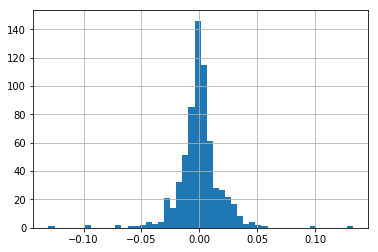

In [44]:
daily_rtr.hist(bins=50)

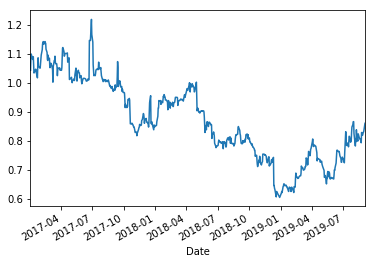

In [46]:
# cumulative daily returns
daily_rtr_cum = (1 + daily_rtr).cumprod()
daily_rtr_cum.plot()

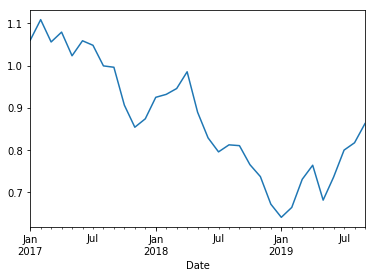

In [47]:
monthly_return_cum = daily_rtr_cum.resample("M").mean()

monthly_return_cum.plot()

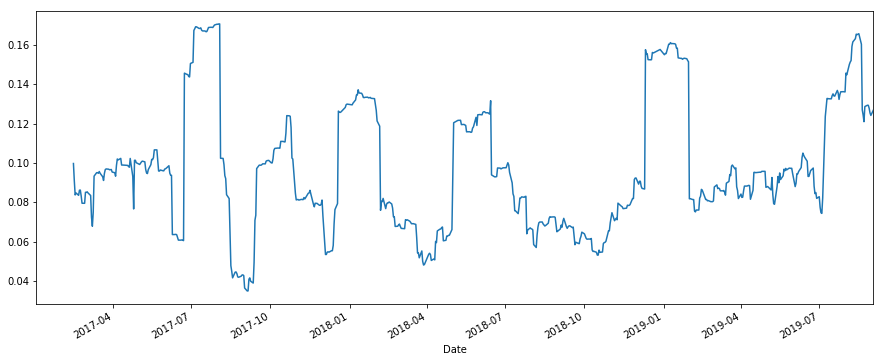

In [50]:
# Volatility of stocks
periods = 30 
vol = df['Close'].pct_change().rolling(periods).std() * np.sqrt(periods) 

vol.plot(figsize=(15, 6))
